### Gerekli kütüphaneler

In [1]:
import re
import nltk
import jpype
import string
import unidecode
import pandas as pd
from typing import List
from nltk.tokenize import word_tokenize
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

C:\Users\golive\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_excel('ornek_textler.xlsx')

In [4]:
df

,Yorumlar
0,<body> <h3> Lise 3'te arkadaşımla bir kitap fuarına gitmiştik. </h3> </body>
1,https://www.kitapyorumlari.com da yorumlarını okumuştum.
2,Arkadaşım okuduğu Nar Ağacı'nı önerdi.
3,"Adı Mor Mürekkep, kapağında bolca morluk var, sayfa sayısı da ideal deyip aldım."
4,O zaman ki ben için de gayet makul bir sebepti bu kitabı almak için.
5,Kütüphaneme bu şekilde girdi.
6,Neredeyse bir yıldır - okuma hevesiyle- elimde sürünen bir kitap kendisi.
7,"Her şeyin bir zamanı var, kitaplar dahil."
8,Bazen bir kitap öyle bir anda gelir ki ona ihtiyacın vardır.
9,Bu kitabın da zamanı olduğuna inanıyorum. Bugün zamanıymış demek ki.


Dataframeler ile çalışırken öncellikle veri özelliklerine bakmanız gerekli.
Mesela eğer boş olan satırlar var ise silinmelidir.

Eksik değer kontrolü

In [5]:
df.isna().sum()

Yorumlar    0
dtype: int64

In [6]:
df['Yorumlar'].dropna(inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Yorumlar  17 non-null     object
dtypes: object(1)
memory usage: 264.0+ bytes


1. URL ve HMTL taglerini kaldırma

In [7]:
def remove_HTML_tags(text):
    html_pattern = r'<.*?>'
    text = re.sub(pattern=html_pattern, repl=' ', string=text)
    return text

In [8]:
def remove_URL(text):
    text = re.sub('https\S+', '', text)
    return text

In [9]:
df['Yorumlar'] = df['Yorumlar'].apply(remove_HTML_tags)
df['Yorumlar'] = df['Yorumlar'].apply(remove_URL)

3. Lemmatizer

In [10]:
def tokenizasyon(text):
    return word_tokenize(text)

In [11]:
def lemmatizer(text):
    lemma_words = []
    ZEMBEREK_PATH = 'zemberek-full_old.jar'
    if jpype.isJVMStarted() is False:
        startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
        lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
        lemma_words.append(lemma_word)
    text = ' '.join(lemma_words)
    return text


In [12]:
df['Yorumlar'] = df['Yorumlar'].apply(lemmatizer)

4. Küçük harfe çevirmek

In [13]:
def convert_lowercase(text):
    return text.lower()

In [14]:
df['Yorumlar'] = df['Yorumlar'].apply(convert_lowercase)

5. Özel karakterlerin kaldırılması

In [15]:
def remove_punctuation(text):
    return ''.join(d for d in text if d not in string.punctuation)


In [16]:
df['Yorumlar'] = df['Yorumlar'].apply(remove_punctuation)

6. Stopwordlerin kaldırılması

In [17]:
def remove_stopwords(text):
    stopwords = []
    with open('stopwords.txt', 'r',encoding='utf-8') as f:
        for word in f:
            word = word.split('\n')
            stopwords.append(word[0])
    clean_text = ' '.join(s for  s in text.split() if s not in stopwords)
    return clean_text

In [18]:
df['Yorumlar'] = df['Yorumlar'].apply(remove_stopwords)

7. Fazla boşlukların silinmesi

In [19]:
def clean_extra_space(text):
    text = re.sub(' +', ' ', text)
    return text.strip()

In [20]:
df['Yorumlar'] = df['Yorumlar'].apply(clean_extra_space)

8. Asciification

In [21]:
def convert_ascii(text):
    text = unidecode.unidecode(text)
    return text

In [22]:
df['Yorumlar'] = df['Yorumlar'].apply(convert_ascii)

9. Sayıları kaldırmak

In [23]:
def remove_numbers(text):
    text = re.sub(r'\d', '', text)
    return text

In [24]:
df['Yorumlar'] = df['Yorumlar'].apply(remove_numbers)

10. Metin uzunluğu 2'den küçük olan verileri kaldırmak

In [25]:
def remove_less_than_2(text):
    text = ' '.join([w for w in text.split() if len(w)>2])
    return text

In [26]:
df['Yorumlar'] = df['Yorumlar'].apply(remove_less_than_2)

WordCloud

In [59]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

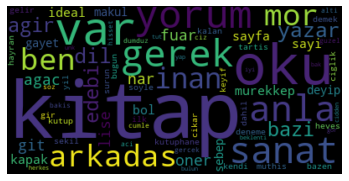

In [60]:
wordcloud = WordCloud().generate(' '.join(text))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

En çok geçen kelimeler

In [61]:
from collections import Counter
import seaborn as sns

In [62]:
kelimeler = []
tokens = df['Yorumlar'].apply(tokenizasyon)
tokens = tokens.values.tolist()
for token in tokens:
    for tok in token:
        kelimeler.append(tok)

<AxesSubplot:>

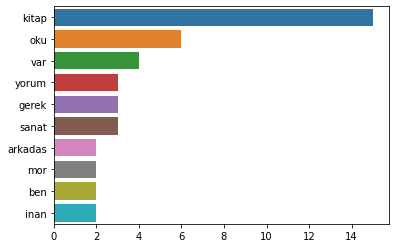

In [63]:
counter = Counter(kelimeler)
most = counter.most_common()

x, y = [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)